Задача. Варьируя параметры ансамбля в подходам блэндинг и стэкинг, обучить оптимальный классификатор.
Визуализировать графики зависимости предсказания от параметров модели.

In [ ]:
from datasets import load_dataset
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

dataset = load_dataset('json', data_files={'train': 'train.jsonl','test':'validation.jsonl'})

vectorizer = CountVectorizer(max_features=500, min_df=4, max_df=0.7, stop_words=stopwords.words('english'))
X_train_vec = vectorizer.fit_transform(dataset['train']['text'])

vocabulary = vectorizer.get_feature_names_out()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_train_idf = tfidf.fit_transform(X_train_vec)

X_test_vec = vectorizer.transform(dataset['test']['text'])
X_test_idf = tfidf.transform(X_test_vec)

X_train = X_train_idf.toarray()
X_test = X_test_idf.toarray()

X_train, X_test, y_train, y_test = X_train, X_test, dataset['train']['label'], dataset['test']['label']

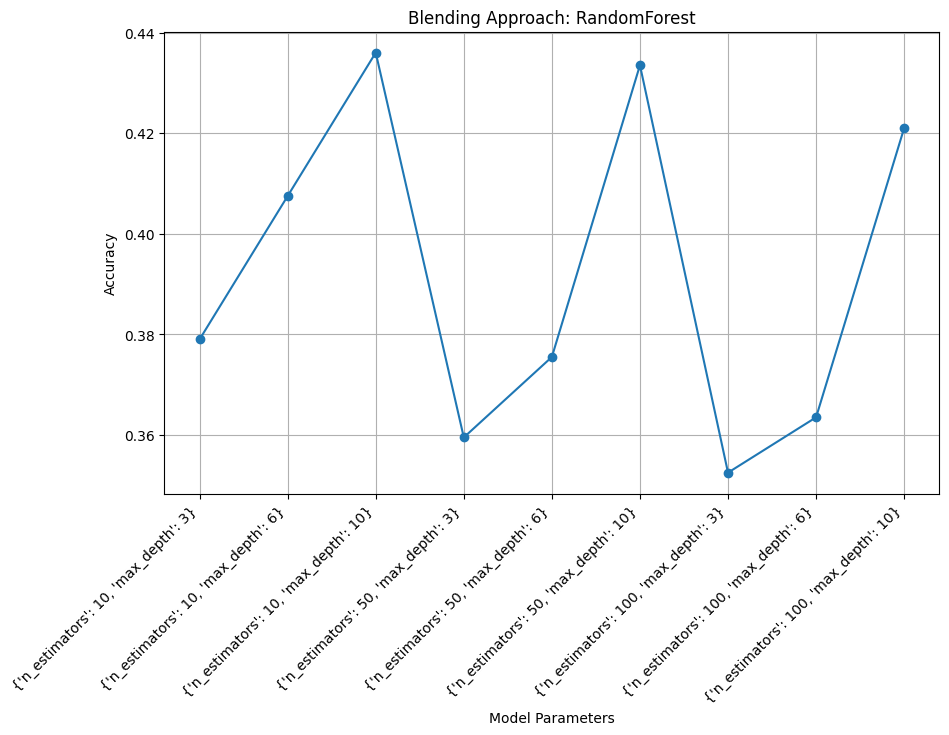

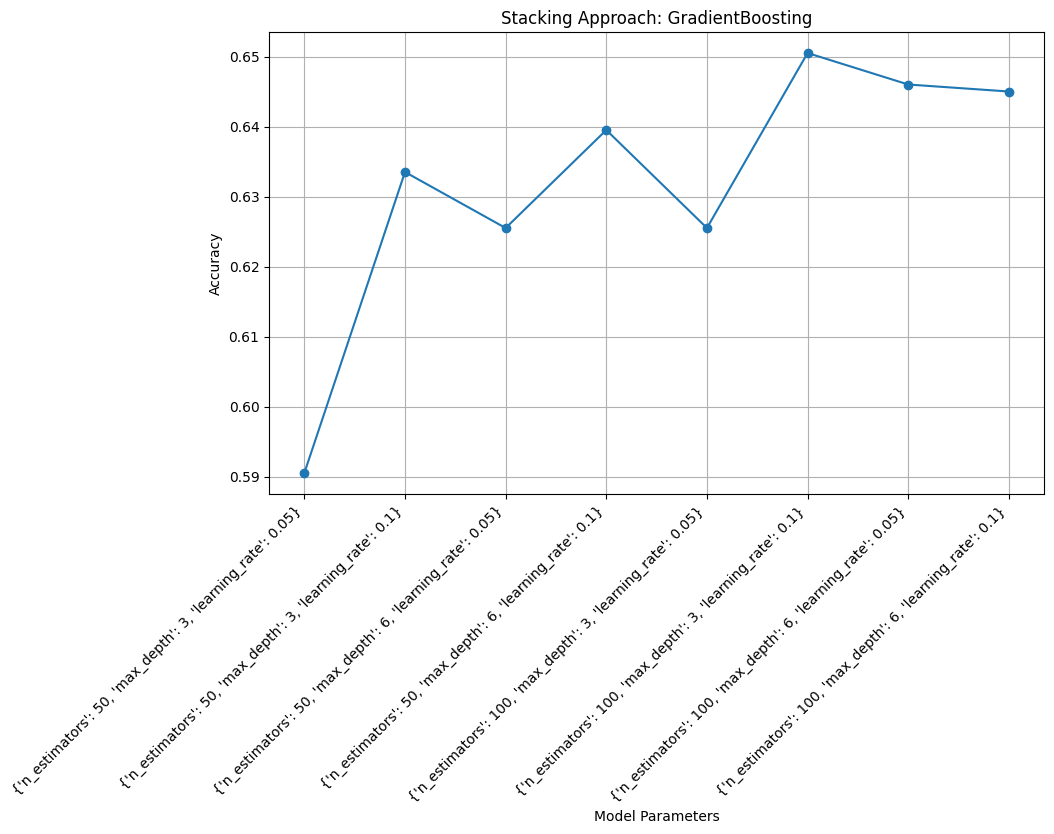

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


def evaluate_models(parameters, model_cls, X_train, y_train, X_test, y_test, title):
    accuracies = []
    for param in parameters:
        
        model = model_cls(**param)
        model.fit(X_train, y_train)
        
        predictions = model.predict(X_test)
        acc = accuracy_score(y_test, predictions)
        accuracies.append(acc)

    parameters = [{key: value for key, value in param.items() if key != 'random_state'} 
                   for param in parameters]

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(parameters)), accuracies, marker='o')
    plt.xticks(range(len(parameters)), [str(p) for p in parameters], rotation=45, ha="right")
    plt.xlabel("Model Parameters")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.grid(True)
    plt.show()
    return accuracies


rf_params = [{'n_estimators': n, 'max_depth': d, 'random_state': 42} 
             for n in [10, 50, 100] 
             for d in [3, 6, 10]]


gb_params = [{'n_estimators': n, 'max_depth': d, 'learning_rate': lr, 'random_state': 42} 
             for n in [50, 100] 
             for d in [3, 6] 
             for lr in [0.05, 0.1]]


rf_accuracies = evaluate_models(rf_params, RandomForestClassifier, X_train, y_train, X_test, y_test, 
                                title="Blending Approach: RandomForest")


gb_accuracies = evaluate_models(gb_params, GradientBoostingClassifier, X_train, y_train, X_test, y_test, 
                                title="Stacking Approach: GradientBoosting")
